In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-data-analysis/Students data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../input/students-data-analysis/Students data.csv')
df.head(5)

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [4]:
df.shape

(105, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [6]:
#Checking for NULL values
df.isnull().sum()

ID                     0
class                  0
gender                 0
race                   0
GPA                    0
Algebra                0
Calculus1              0
Calculus2              0
Statistics             0
Probability            0
Measure                0
Functional_analysis    0
from1                  0
from2                  0
from3                  0
from4                  0
y                      0
dtype: int64

In [7]:
df.isna().sum()

ID                     0
class                  0
gender                 0
race                   0
GPA                    0
Algebra                0
Calculus1              0
Calculus2              0
Statistics             0
Probability            0
Measure                0
Functional_analysis    0
from1                  0
from2                  0
from3                  0
from4                  0
y                      0
dtype: int64

array([[<AxesSubplot:xlabel='ID', ylabel='ID'>,
        <AxesSubplot:xlabel='race', ylabel='ID'>,
        <AxesSubplot:xlabel='GPA', ylabel='ID'>,
        <AxesSubplot:xlabel='Algebra', ylabel='ID'>,
        <AxesSubplot:xlabel='Calculus1', ylabel='ID'>,
        <AxesSubplot:xlabel='Calculus2', ylabel='ID'>,
        <AxesSubplot:xlabel='Statistics', ylabel='ID'>,
        <AxesSubplot:xlabel='Probability', ylabel='ID'>,
        <AxesSubplot:xlabel='Measure', ylabel='ID'>,
        <AxesSubplot:xlabel='Functional_analysis', ylabel='ID'>,
        <AxesSubplot:xlabel='from4', ylabel='ID'>,
        <AxesSubplot:xlabel='y', ylabel='ID'>],
       [<AxesSubplot:xlabel='ID', ylabel='race'>,
        <AxesSubplot:xlabel='race', ylabel='race'>,
        <AxesSubplot:xlabel='GPA', ylabel='race'>,
        <AxesSubplot:xlabel='Algebra', ylabel='race'>,
        <AxesSubplot:xlabel='Calculus1', ylabel='race'>,
        <AxesSubplot:xlabel='Calculus2', ylabel='race'>,
        <AxesSubplot:xlabel='Statistic

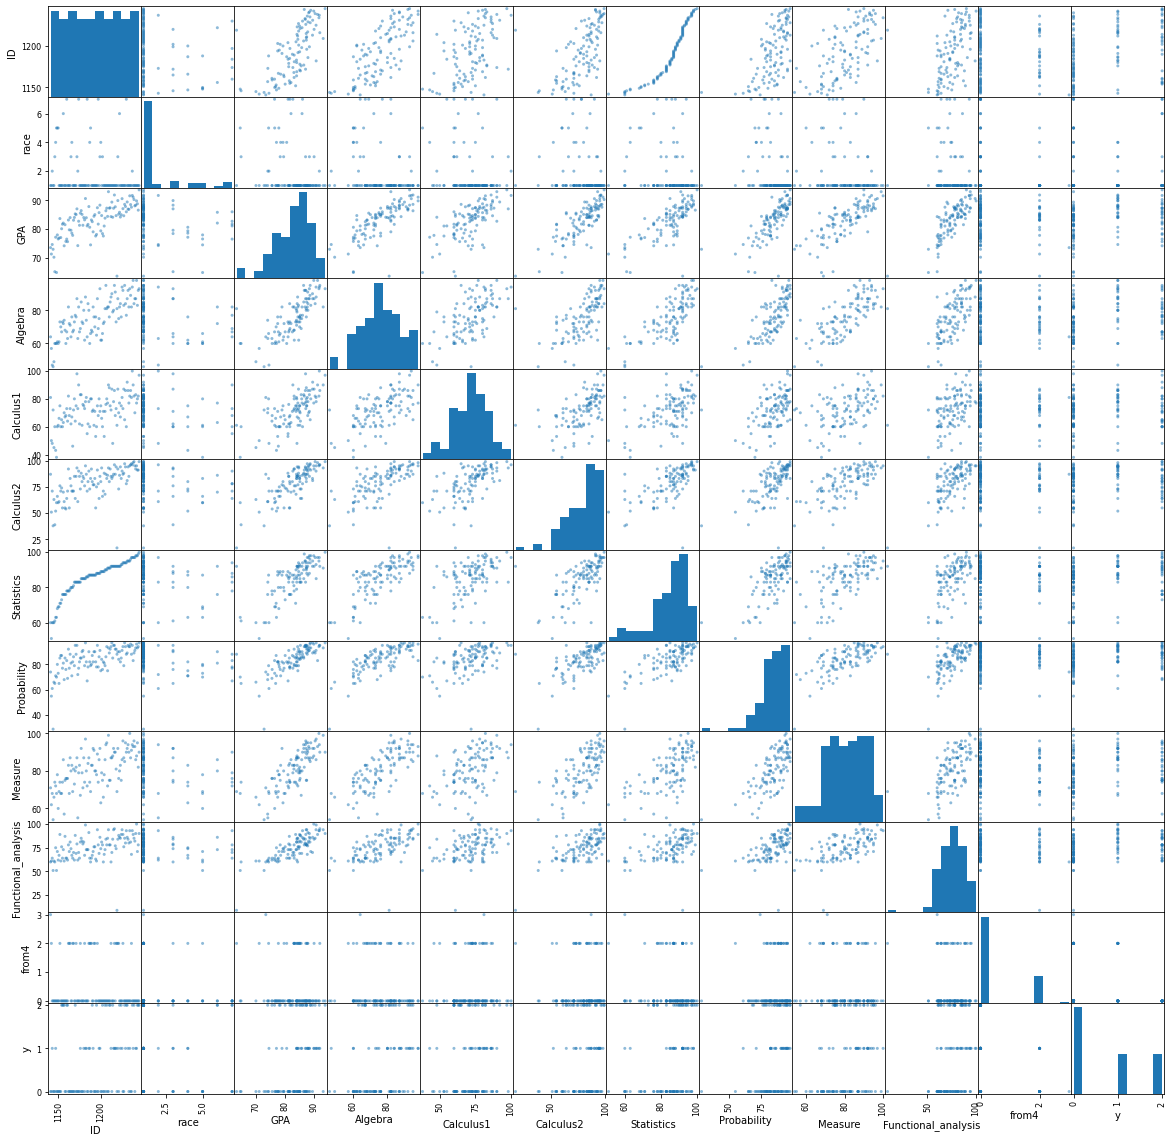

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20))

In [9]:
df.loc[:,"class"].value_counts()

A    76
B    29
Name: class, dtype: int64

In [10]:
df["class"]=df["class"].apply(lambda x : 0  if x=='M' else 1)

In [11]:
df.loc[:,"gender"].value_counts()

female    68
male      37
Name: gender, dtype: int64

In [12]:
df["gender"]=df["gender"].apply(lambda x : 0  if x=='male' else 1)

In [13]:
df.loc[:,"from2"].value_counts()

B    73
A    32
Name: from2, dtype: int64

In [14]:
df["from2"]=df["from2"].apply(lambda x : 0  if x=='B' else 1)

In [15]:
df.loc[:,"from3"].value_counts()

A    81
D    10
S     6
C     4
B     4
Name: from3, dtype: int64

In [16]:
def background(x):
  if x=='A':
        x= 0
  elif x == 'D':
        x = 1
  elif x=='S':
        x= 2 
  elif x=='C':
        x= 3
  else:
        x= 4
  return x

df['from3']=df['from3'].apply(background)

In [17]:
df.loc[:,"from1"].value_counts()

B     9
E     9
P     8
X     7
K     6
M     5
N     5
A     4
F     4
U     4
H     4
S     4
J     4
T     3
O     3
I     3
C     3
Q     2
R     2
G     2
V     2
D     2
Z     2
W     2
Y     2
AA    2
L     1
AB    1
Name: from1, dtype: int64

In [18]:
df['from1'] = df['from1'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26,'AA':27,'AB':28})

In [19]:
df.loc[:,"from4"].value_counts()

0    79
2    25
3     1
Name: from4, dtype: int64

In [20]:
df.loc[:,"race"].value_counts()

1    81
3     6
7     5
4     4
5     4
2     3
6     2
Name: race, dtype: int64

In [21]:
df.drop(["ID","class","from1"],axis=1,inplace=True)

<AxesSubplot:>

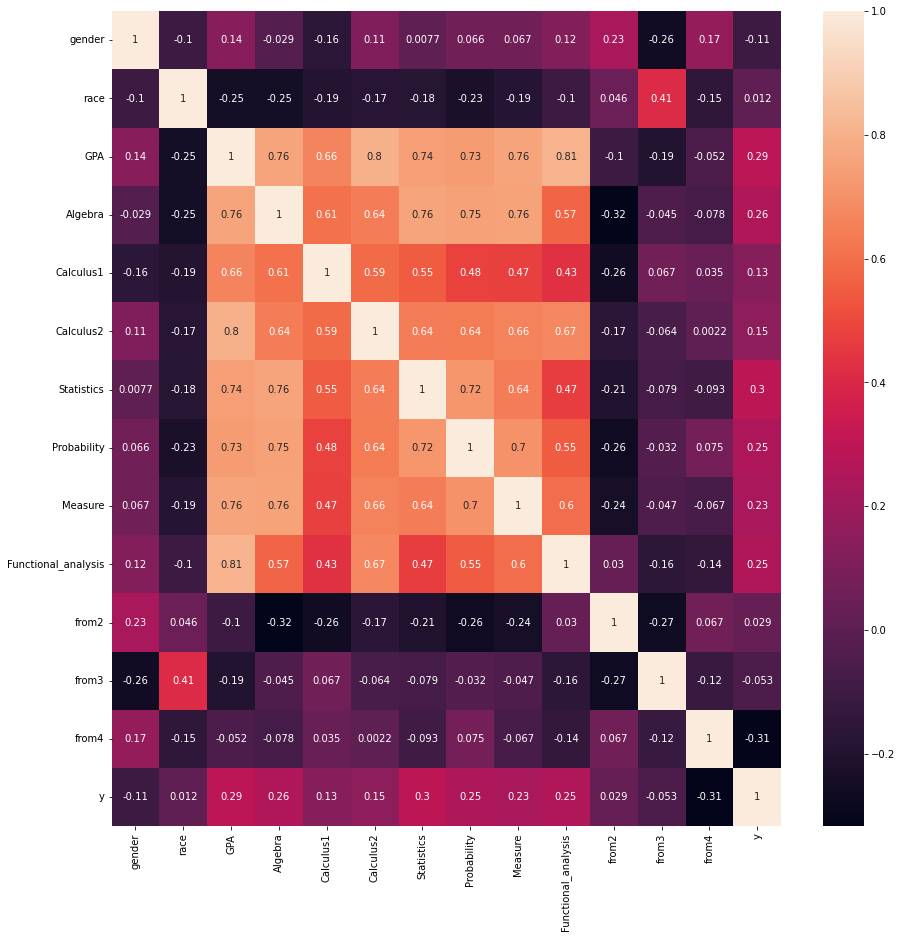

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, ax=ax)

In [23]:
#Feature Selection
cor_matrix = df.corr().abs()
print(cor_matrix)

                       gender      race       GPA   Algebra  Calculus1  \
gender               1.000000  0.104744  0.135287  0.028855   0.159981   
race                 0.104744  1.000000  0.246571  0.249298   0.192550   
GPA                  0.135287  0.246571  1.000000  0.761590   0.660560   
Algebra              0.028855  0.249298  0.761590  1.000000   0.608083   
Calculus1            0.159981  0.192550  0.660560  0.608083   1.000000   
Calculus2            0.106703  0.173228  0.803865  0.640578   0.588929   
Statistics           0.007672  0.179594  0.740903  0.759595   0.547605   
Probability          0.065575  0.229312  0.732898  0.752480   0.484766   
Measure              0.066520  0.186478  0.758676  0.755499   0.471347   
Functional_analysis  0.118591  0.102435  0.809451  0.572575   0.430825   
from2                0.228517  0.046013  0.102915  0.317142   0.258705   
from3                0.260408  0.410050  0.194557  0.045308   0.066558   
from4                0.172911  0.15435

In [24]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                     gender      race       GPA   Algebra  Calculus1  \
gender                  NaN  0.104744  0.135287  0.028855   0.159981   
race                    NaN       NaN  0.246571  0.249298   0.192550   
GPA                     NaN       NaN       NaN  0.761590   0.660560   
Algebra                 NaN       NaN       NaN       NaN   0.608083   
Calculus1               NaN       NaN       NaN       NaN        NaN   
Calculus2               NaN       NaN       NaN       NaN        NaN   
Statistics              NaN       NaN       NaN       NaN        NaN   
Probability             NaN       NaN       NaN       NaN        NaN   
Measure                 NaN       NaN       NaN       NaN        NaN   
Functional_analysis     NaN       NaN       NaN       NaN        NaN   
from2                   NaN       NaN       NaN       NaN        NaN   
from3                   NaN       NaN       NaN       NaN        NaN   
from4                   NaN       NaN       NaN       NaN       

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [25]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(); print(to_drop)


['Calculus2', 'Functional_analysis']


In [26]:
df.drop(['Calculus2','Functional_analysis'],axis=1,inplace=True)

In [27]:
df

,gender,race,GPA,Algebra,Calculus1,Statistics,Probability,Measure,from2,from3,from4,y
0,0,1,73.47,64,81,60,74,71,1,0,3,0
1,1,1,71.22,57,50,51,55,62,1,0,2,0
2,1,2,74.56,47,48,60,61,68,1,0,0,1
3,1,1,72.89,46,72,60,29,54,1,0,0,0
4,1,1,70.11,49,45,60,66,66,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,88.34,87,83,98,93,86,0,0,0,1
101,0,1,89.84,98,77,98,96,88,0,0,0,1
102,0,1,88.82,83,80,98,93,95,0,0,0,2
103,0,1,86.60,92,82,99,94,82,0,0,0,2


In [28]:
from scipy.stats import zscore

df['GPA'] = zscore(df['GPA'])
df['Algebra'] = zscore(df['Algebra'])
df['Calculus1'] = zscore(df['Calculus1'])
df['Statistics'] = zscore(df['Statistics'])
df['Probability'] = zscore(df['Probability'])

data=df

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.datasets import make_classification

In [30]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=42)

In [31]:
logistic_model = LogisticRegression(multi_class='ovr')
logistic_model.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='ovr')

In [32]:
Y_pred = logistic_model.predict(X_test)

In [33]:
accuracy = accuracy_score(Y_test,Y_pred)*100
confusion_mat = confusion_matrix(Y_test,Y_pred)

In [34]:
print(accuracy)

61.904761904761905
